In [16]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import regularizers

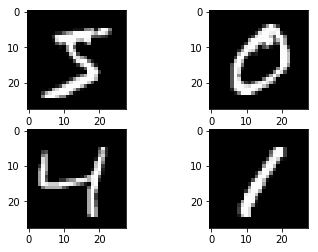

In [17]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [18]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [20]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [21]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
# define baseline model
def baseline_model(num_hidden, num_neurons):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    for i in range(num_hidden):
        model.add(Dense(int(num_pixels/(2**(num_neurons))), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = baseline_model(1, 1)
# Fit the model
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.2318 - acc: 0.9317 - val_loss: 0.1008 - val_acc: 0.9692
Epoch 2/10
 - 12s - loss: 0.0762 - acc: 0.9774 - val_loss: 0.0777 - val_acc: 0.9763
Epoch 3/10
 - 12s - loss: 0.0499 - acc: 0.9856 - val_loss: 0.0635 - val_acc: 0.9807
Epoch 4/10
 - 11s - loss: 0.0339 - acc: 0.9909 - val_loss: 0.0608 - val_acc: 0.9804
Epoch 5/10
 - 10s - loss: 0.0245 - acc: 0.9939 - val_loss: 0.0590 - val_acc: 0.9827
Epoch 6/10
 - 10s - loss: 0.0178 - acc: 0.9965 - val_loss: 0.0578 - val_acc: 0.9829
Epoch 7/10
 - 10s - loss: 0.0131 - acc: 0.9977 - val_loss: 0.0560 - val_acc: 0.9832
Epoch 8/10
 - 10s - loss: 0.0098 - acc: 0.9985 - val_loss: 0.0557 - val_acc: 0.9836
Epoch 9/10
 - 11s - loss: 0.0072 - acc: 0.9992 - val_loss: 0.0565 - val_acc: 0.9834
Epoch 10/10


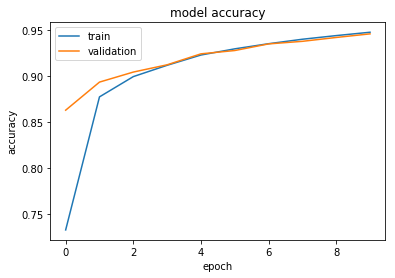

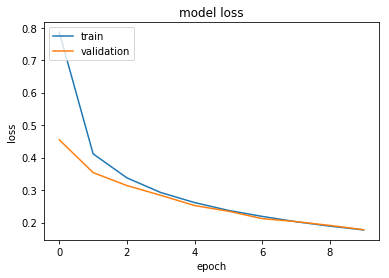

In [13]:
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()